# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [41]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = ["#FF8853", "#FFE174", "#007597", "#C1C36D", "#00A697", "#BC97E0", "#ffc0bf"] #[ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [3]:
def show_values_on_bars(axs, size=14):
    def _show_on_single_plot(ax, size=size):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = max(p.get_y() + p.get_height() - 0.15, 0.1)
            value = '{:.2f}'.format(p.get_height())
            # print(_y, p.get_facecolor())
            blue_col = p.get_facecolor()[2]
            green_col = p.get_facecolor()[1]
#             if(p.get_height()<0.2):
#                 continue
            if(green_col>0.5):# or green_col<0.4):
                ax.text(_x, _y, value, ha="center", size=size) 
            else:
                ax.text(_x, _y, value, ha="center", size=size, color="white")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Result Data

In [4]:
results_dict = {}

## Logistic Regression

In [5]:
df_results_lr = pd.read_excel("Results/TopicModeling_BOW_LR_Results.xlsx")

## Encoders

In [6]:
df_results_Encoders_abstract = pd.read_excel("Results/TopicModeling_Encoder_Results_Abstract.xlsx")
df_results_Encoders_titles = pd.read_excel("Results/TopicModeling_Encoder_Results_Title.xlsx")

## Group Results

In [27]:
df_results_full = pd.concat([df_results_lr, df_results_Encoders_abstract, df_results_Encoders_titles])

In [29]:
df_results_full.to_excel("Results/Topic_Modeling_Full_Results.xlsx", index = False)

In [32]:
# Calculate per average per database per model
average_rows = []
for text in ["Title", "Abstract"]:
    for model in ["Logistic Regression", "EcoBERT", "DistilBERT", "DeBERTa_v3", "ELECTRA"]:
        metric_averages = []
        print(dataset, model)
        for metric in ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]:
            avg = 0
            for dataset in ["LPI", "PREDICTS"]:
                df_subset = df_results_full[(df_results_full["Dataset"]==dataset)*
                                            (df_results_full["Model"]==model)*
                                            (df_results_full["Text"]==text)]
                
                avg += df_subset[metric].values[0]/2
            metric_averages.append(avg)
        average_rows.append(["Average", text] + metric_averages + [model])

PREDICTS Logistic Regression
PREDICTS EcoBERT
PREDICTS DistilBERT
PREDICTS DeBERTa_v3
PREDICTS ELECTRA
PREDICTS Logistic Regression
PREDICTS EcoBERT
PREDICTS DistilBERT
PREDICTS DeBERTa_v3
PREDICTS ELECTRA


In [33]:
df_results_full = pd.concat([df_results_full, pd.DataFrame(average_rows, columns = df_results_full.columns)])

In [35]:
df_results_full

,Dataset,Text,Accuracy,Precision,Recall,F1-Score,AUC,Model
0,LPI,Title,0.932576,0.706731,0.812155,0.755784,0.881240,Logistic Regression
1,LPI,Abstract,0.960256,0.801932,0.917127,0.855670,0.941870,Logistic Regression
2,PREDICTS,Title,0.961705,0.780220,0.916129,0.842730,0.941791,Logistic Regression
3,PREDICTS,Abstract,0.973266,0.843023,0.935484,0.886850,0.956757,Logistic Regression
0,LPI,Abstract,0.977999,0.898936,0.933702,0.915989,0.959115,EcoBERT
1,PREDICTS,Abstract,0.984827,0.918750,0.948387,0.933333,0.968905,EcoBERT
2,LPI,Abstract,0.977999,0.898936,0.933702,0.915989,0.959115,DistilBERT
3,PREDICTS,Abstract,0.984827,0.918750,0.948387,0.933333,0.968905,DistilBERT
4,LPI,Abstract,0.977289,0.916201,0.906077,0.911111,0.946931,DeBERTa_v3
5,PREDICTS,Abstract,0.979769,0.889571,0.935484,0.911950,0.960419,DeBERTa_v3


# Model Comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_88724\3927803164.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


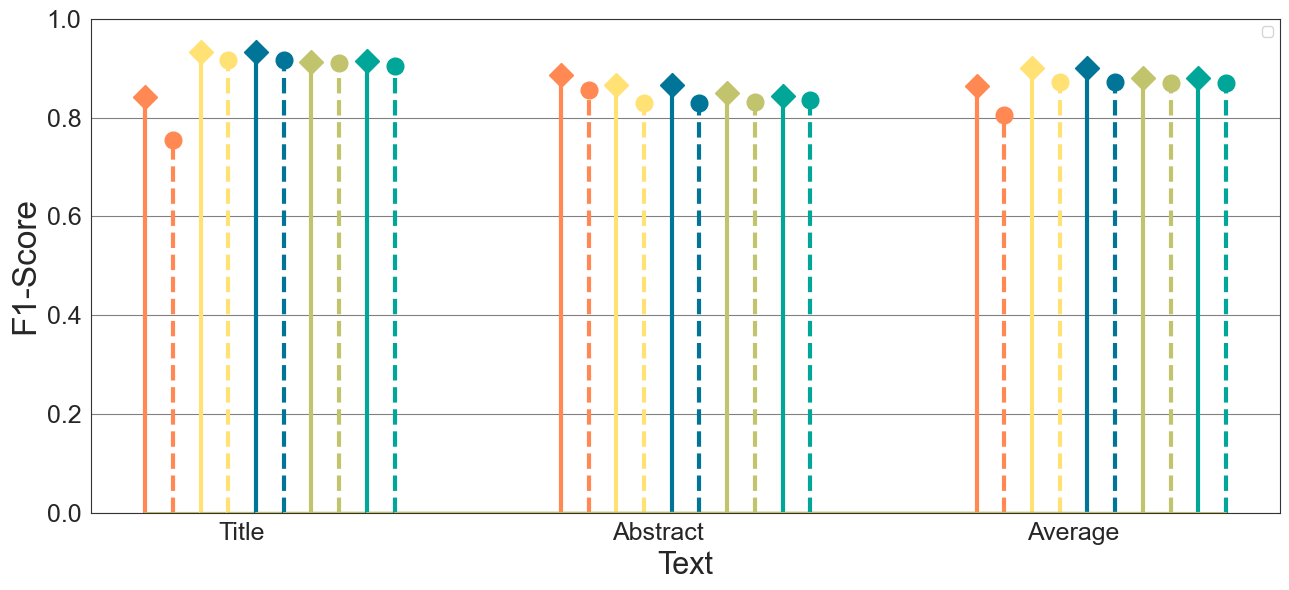

In [17]:
for i, metric in enumerate(["F1-Score"]):

    fig, axes  = plt.subplots(figsize=(13,6), nrows = 1)
    start = 0
    for j, model in enumerate(["Logistic Regression", "EcoBERT", "DistilBERT", "DeBERTa_v3", "ELECTRA"]):
        for k, dataset in enumerate(["PREDICTS", "LPI"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Dataset"]==dataset)*df_results_full["Text"].apply(lambda x: x in ["Title", "Abstract", "Average"])]
            if(dataset=="PREDICTS"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                    
            if(dataset=="LPI"):
                (markers, stemlines, baseline) = plt.stem(start + 1 + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 2
    
    axes.set_xticks(np.arange(3.5, 45, 15))
    axes.set_xticklabels(["Title", "Abstract", "Average"], size=18, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes.grid(axis='x')
    plt.xlabel("Text", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    if(i==0):
        plt.legend()
    # plt.xlim(-1.5, 64)
    # plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_88724\821123784.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


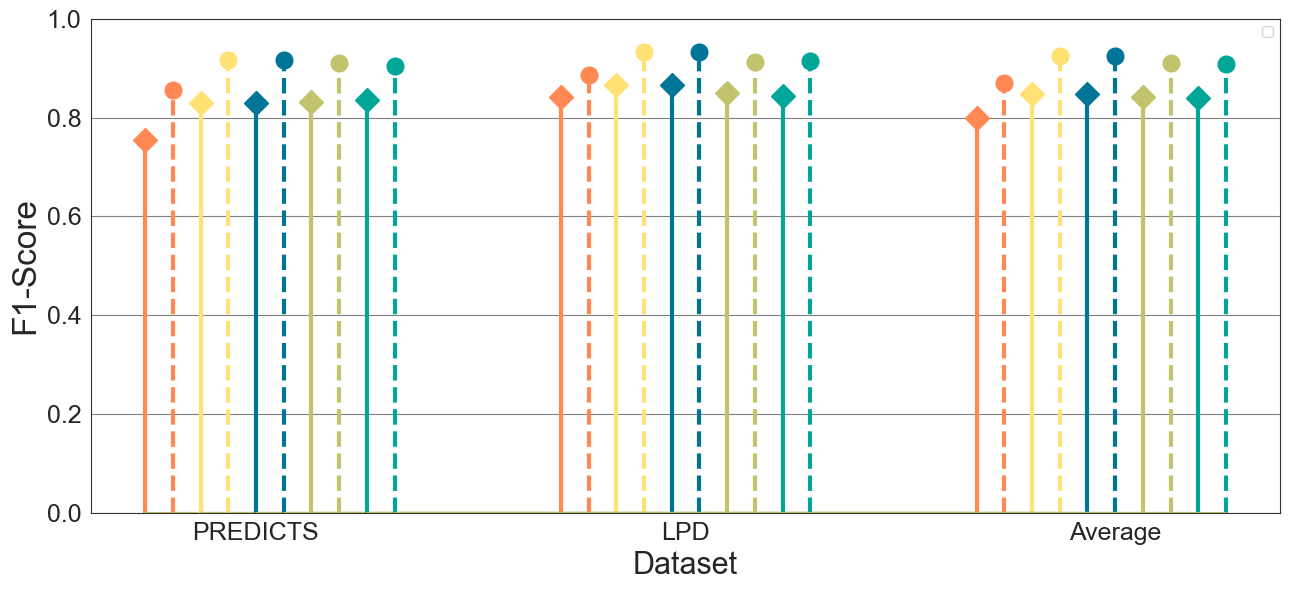

In [36]:
for i, metric in enumerate(["F1-Score"]):

    fig, axes  = plt.subplots(figsize=(13,6), nrows = 1)
    start = 0
    for j, model in enumerate(["Logistic Regression", "EcoBERT", "DistilBERT", "DeBERTa_v3", "ELECTRA"]):
        for k, text in enumerate(["Title", "Abstract"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Text"]==text)*df_results_full["Dataset"].apply(lambda x: x in ["PREDICTS", "LPI", "Average"])]
            if(text=="Title"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                    
            if(text=="Abstract"):
                (markers, stemlines, baseline) = plt.stem(start + 1 + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 2
    
    axes.set_xticks(np.arange(4, 45, 15.5))
    axes.set_xticklabels(["PREDICTS", "LPD", "Average"], size=18, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes.grid(axis='x')
    plt.xlabel("Dataset", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    if(i==0):
        plt.legend()
    # plt.xlim(-1.5, 64)
    # plt.legend()
    plt.tight_layout()
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_88724\4217168928.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


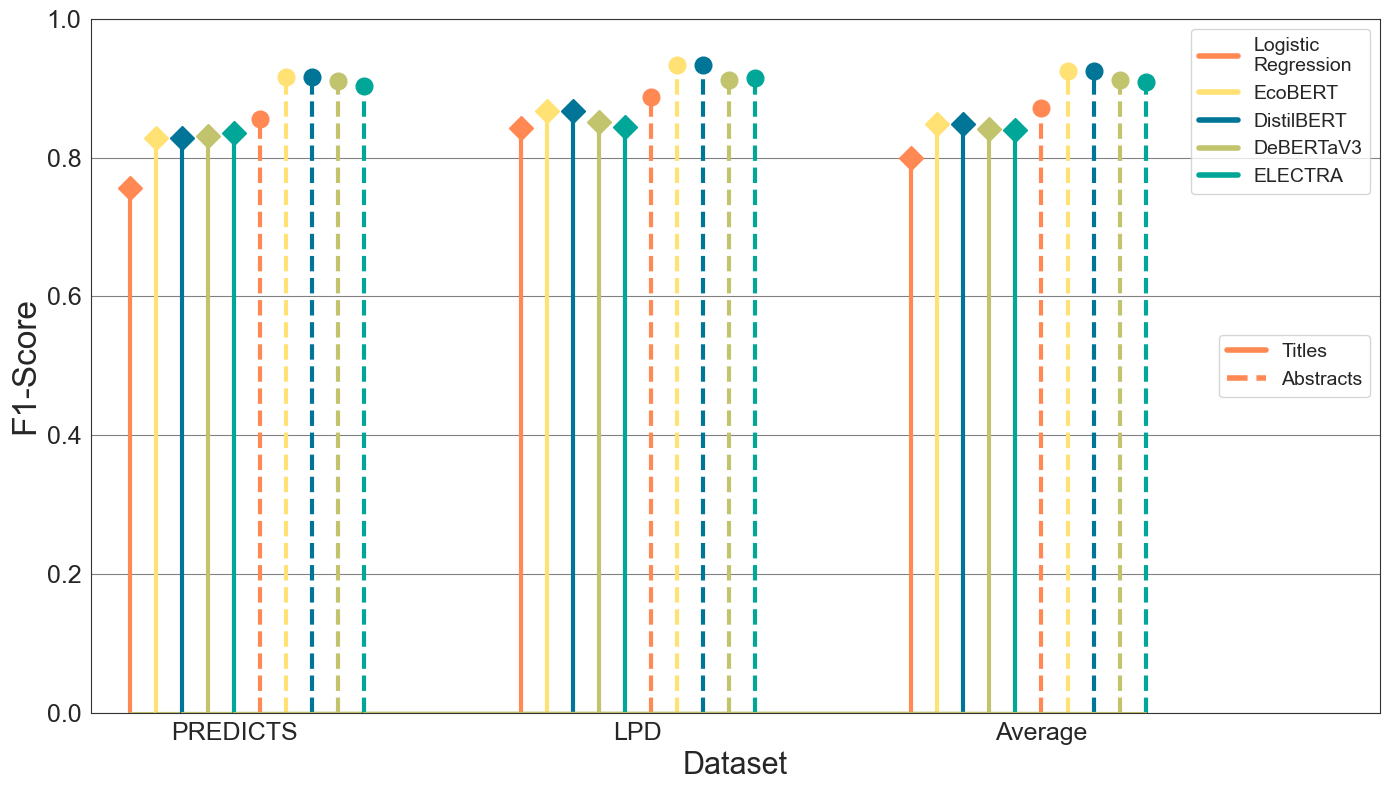

In [60]:
for i, metric in enumerate(["F1-Score"]):

    fig, axes  = plt.subplots(figsize=(14,8), nrows = 1)
    start = 0
    for j, model in enumerate(["Logistic Regression", "EcoBERT", "DistilBERT", "DeBERTa_v3", "ELECTRA"]):
        for k, text in enumerate(["Title", "Abstract"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Text"]==text)*df_results_full["Dataset"].apply(lambda x: x in ["PREDICTS", "LPI", "Average"])]
            if(text=="Title"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                    
            if(text=="Abstract"):
                (markers, stemlines, baseline) = plt.stem(start + 5 + np.arange(len(df_subset))*15, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 1
    
    axes.set_xticks(np.arange(4, 45, 15.5))
    axes.set_xticklabels(["PREDICTS", "LPD", "Average"], size=18, rotation="horizontal")
    axes.set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes.grid(axis='x')
    plt.xlabel("Dataset", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    if(i==0):
        plt.legend()
    plt.xlim(-1.5, 48)
    # plt.legend()
    plt.tight_layout()
    traits = [mlines.Line2D([], [], color=color_palette[i], marker='', ls='-', linewidth = 4, label=focus_name) for i, focus_name in enumerate(["Logistic\nRegression", "EcoBERT", "DistilBERT", "DeBERTaV3", "ELECTRA"])]
    # plt.legend(handles=traits, fontsize = 14, loc = "upper right")

    datasets = [mlines.Line2D([], [], color=color_palette[0], marker='', ls='-', markersize = 10, linewidth = 4, label="Titles"), mlines.Line2D([], [], color=color_palette[0], marker='', ls='--', markersize = 10, linewidth = 4, label="Abstracts")]
    legend1 = plt.legend(handles = datasets, fontsize = 14, loc = "center right")
    plt.legend(handles=traits, fontsize = 14, loc = "upper right")
    plt.gca().add_artist(legend1)


    plt.show()